In [1]:
from mlfunctions import MNISTNet, cache, do_fit, MNISTLoss, w, Optimizer, fit_optimizer
import numpy as np
import torch.optim as optim
import glob
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import multiprocessing
import os.path
import csv
import copy
import joblib
from torchvision import datasets
import torchvision
import seaborn as sns; sns.set(color_codes=True)
sns.set_style("white")
from pdb import set_trace as bp
from meta_module import MetaLinear, MetaModule
import functools

In [5]:
class MNISTNet2Layer(MNISTNet):
    def __init__(self, *args, **kwargs):
        super().__init__(n_layers=2, *args, **kwargs)
        
class MNISTNetBig(MNISTNet):
    def __init__(self, *args, **kwargs):
        super().__init__(layer_size=40, *args, **kwargs)
        
class MNISTRelu(MNISTNet):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.activation = nn.ReLU()

class MNISTSigmoid(MNISTNet):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.activation = nn.Sigmoid()
     
        

In [3]:
@cache.cache
def get_fit_dict_test(n_tests, opt_dict, *args, **kwargs):
    opt = w(Optimizer(preproc=True))
    opt.load_state_dict(opt_dict)
    np.random.seed(0)
    return [do_fit(opt, *args, **kwargs) for _ in tqdm(range(N_TESTS), 'optimizer')]


@cache.cache
def fit_normal(target_cls, target_to_opt, opt_class, n_tests=100, n_epochs=100, **kwargs):
    results = []
    for i in tqdm(range(n_tests), 'tests'):
        target = target_cls(training=False)
        optimizee = w(target_to_opt())
        optimizer = opt_class(optimizee.parameters(), **kwargs)
        total_loss = []
        for _ in range(n_epochs):
            loss = optimizee(target)
            
            total_loss.append(loss.data.cpu().numpy())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        results.append(total_loss)
    return results


In [6]:
loss, mnist_optimizer = fit_optimizer(MNISTLoss, MNISTSigmoid, lr=0.01, n_epochs=50, n_tests=20, out_mul=0.1, preproc=True)

epochs:   0%|          | 0/50 [00:00<?, ?it/s]

iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

66.609695
100000000000000000 66.609695


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

101.89998


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

57.8115
66.609695 57.8115


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

58.18938


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

59.64253


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

61.00539


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

62.844627


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

60.147095


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

72.80682


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

65.380135


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

58.349663


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

58.93333


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

66.50699


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

60.868908


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

62.04377


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

53.70559
57.8115 53.70559


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

59.090252


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

54.649742


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

53.332176
53.70559 53.332176


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

53.554558


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

48.58628
53.332176 48.58628


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

50.26892


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

49.761166


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

50.789753


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

51.01534


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

47.69385
48.58628 47.69385


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

47.381832
47.69385 47.381832


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

51.2228


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

46.831573
47.381832 46.831573


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

50.100708


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

46.244762
46.831573 46.244762


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

47.56246


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

46.50725


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

45.25908
46.244762 45.25908


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

45.299496


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

47.60311


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

46.82719


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

46.764473


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

48.883034


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

47.142563


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

46.318974


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

46.041622


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

48.850517


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

46.845142


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

45.96361


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

48.882668


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

45.73314


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

45.013817
45.25908 45.013817


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

45.078644


iterations:   0%|          | 0/20 [00:00<?, ?it/s]

tests:   0%|          | 0/20 [00:00<?, ?it/s]

44.756836
45.013817 44.756836


In [8]:
torch.save(mnist_optimizer, "mnist-sigmoid.pt")

In [12]:
# RELU on RELU

mnist_optimizer = torch.load('mnist-relu.pt')
NORMAL_OPTS = [(optim.Adam, {}), (optim.RMSprop, {}), (optim.SGD, {'momentum': 0.9}), (optim.SGD, {'nesterov': True, 'momentum': 0.9})]
OPT_NAMES = ['ADAM', 'RMSprop', 'SGD', 'NAG']
LEARNING_RATES = [0.01, 0.003, 0.03, 1.0]
N_TESTS = 200
N_EPOCHS = 200

fit_data = np.zeros((N_TESTS, N_EPOCHS, len(OPT_NAMES) + 1))
for i, ((opt, extra_kwargs), lr) in enumerate(zip(NORMAL_OPTS, LEARNING_RATES)):
    np.random.seed(0)
    fit_data[:, :, i] = np.array(fit_normal(MNISTLoss, MNISTSigmoid, opt, lr=lr, n_tests=N_TESTS, n_epochs=N_EPOCHS, **extra_kwargs))

fit_data[:, :, len(OPT_NAMES)] = np.array(get_fit_dict_test(N_TESTS, mnist_optimizer, None, MNISTLoss, MNISTSigmoid, 1, N_EPOCHS, N_EPOCHS, out_mul=0.1, should_train=False))

optimizer: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [16:06<00:00,  4.83s/it]


In [13]:
np.save('fit-data-mnist-relu-on-sigmoid.npy', fit_data)

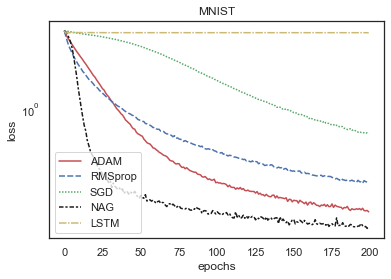

In [14]:
# np.average(fit_data,axis = 0)

ax = sns.lineplot(data=np.average(fit_data, axis=0)[:, :], linestyle='--', palette=['r', 'b', 'g', 'k', 'y'])
condition=OPT_NAMES + ['LSTM']
ax.lines[-1].set_linestyle('-')
ax.legend(condition)
plt.yscale('log')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('MNIST')
plt.show()

In [ ]:
# BIG = 40 units
mnist_optimizer = torch.load('grad-mnist-model.pt')
NORMAL_OPTS = [(optim.Adam, {}), (optim.RMSprop, {}), (optim.SGD, {'momentum': 0.9}), (optim.SGD, {'nesterov': True, 'momentum': 0.9})]
OPT_NAMES = ['ADAM', 'RMSprop', 'SGD', 'NAG']
LEARNING_RATES = [0.01, 0.003, 0.03, 1.0]
N_TESTS = 200
N_EPOCHS = 200

fit_data = np.zeros((N_TESTS, N_EPOCHS, len(OPT_NAMES) + 1))
for i, ((opt, extra_kwargs), lr) in enumerate(zip(NORMAL_OPTS, LEARNING_RATES)):
    np.random.seed(0)
    fit_data[:, :, i] = np.array(fit_normal(MNISTLoss, MNISTNetBig, opt, lr=lr, n_tests=N_TESTS, n_epochs=N_EPOCHS, **extra_kwargs))

fit_data[:, :, len(OPT_NAMES)] = np.array(get_fit_dict_test(N_TESTS, mnist_optimizer, None, MNISTLoss, MNISTNetBig, 1, N_EPOCHS, N_EPOCHS, out_mul=0.1, should_train=False))

tests:  52%|██████████████████████████████████████▎                                  | 105/200 [04:17<04:02,  2.55s/it]

In [ ]:
# RELU activation
mnist_optimizer = torch.load('grad-mnist-model.pt')
NORMAL_OPTS = [(optim.Adam, {}), (optim.RMSprop, {}), (optim.SGD, {'momentum': 0.9}), (optim.SGD, {'nesterov': True, 'momentum': 0.9})]
OPT_NAMES = ['ADAM', 'RMSprop', 'SGD', 'NAG']
LEARNING_RATES = [0.01, 0.003, 0.03, 1.0]
N_TESTS = 200
N_EPOCHS = 200

fit_data = np.zeros((N_TESTS, N_EPOCHS, len(OPT_NAMES) + 1))
for i, ((opt, extra_kwargs), lr) in enumerate(zip(NORMAL_OPTS, LEARNING_RATES)):
    np.random.seed(0)
    fit_data[:, :, i] = np.array(fit_normal(MNISTLoss, MNISTRelu, opt, lr=lr, n_tests=N_TESTS, n_epochs=N_EPOCHS, **extra_kwargs))

fit_data[:, :, len(OPT_NAMES)] = np.array(get_fit_dict_test(N_TESTS, mnist_optimizer, None, MNISTLoss, MNISTRelu, 1, N_EPOCHS, N_EPOCHS, out_mul=0.1, should_train=False))